<a href="https://colab.research.google.com/github/pipall/Kuis1_MachineLearning/blob/main/Copy_of_JS04_SOAL_KUIS1_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pengantar

Pada Kuis 1 ini Anda diminta untuk melakukan proses explorartory data analysis (EDA) dan pra pengolahan data pada dataset "Census Income". Dataset ini merupakan data tabular yang memiliki beberapa nilai yang hilang (missing value) dan nama variabel (fitur) yang perlu disesuaikan.

Untuk membantu Anda, notebook ini akan memberikan kode awal untuk proses download data, load data, dan inspeksi informasi terkait dengan metadata.

# Load Data and Inspect Metadata

In [1]:
# Install UCI REPO Library
!pip install -q ucimlrepo

In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

In [3]:
# fetch data
adult_income = fetch_ucirepo(id=2)

In [4]:
# Data
X = adult_income.data.features
y = adult_income.data.targets

# Concate Features and Target
df = pd.concat([X, y], axis=1)

# Show Top 5
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Data Size
df.shape

(48842, 15)

In [6]:
# Inspect metadata
adult_income.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Tue Sep 24 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was ex

# Bagian 1 - Data Loading dan Data Imputation

## Soal 1 (5 poin)
1.   Lakukan inspeksi profile data
2.   **Variabel apa** yang memiliki **nilai yang hilang** (missing value) dan **berapa** jumlahnya?



In [10]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

print("info dataset:")
display(df.info())

df = df.replace('?', np.nan)

missing_counts = df.isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]

info dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


None

,0
occupation,2809
workclass,2799
native-country,857


## Soal 2 (5 poin)
1. Lakukan proses data imputation pada fitur yang memiliki data yang hilang
2. Cek kembali apakah masih terdapat data yang hilang

In [30]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo

# 2. Ambil dataset Adult Income dari UCI
adult_income = fetch_ucirepo(id=2)

# Pisahkan fitur dan target
fitur = adult_income.data.features
target = adult_income.data.targets

# Gabungkan fitur dan target
df = pd.concat([fitur, target], axis=1)

# 3. Ganti '?' menjadi NaN
df = df.replace('?', np.nan)

print("DataFrame df sudah dibuat?", 'df' in locals() or 'df' in globals())

# 4. Ambil kolom bertipe kategorikal
kolom_kategorikal = df.select_dtypes(include='object').columns

# 5. Fungsi pembersihan kolom kategorikal
def bersihkan_kolom_kategorikal(series):
    series = series.astype(str).str.strip()             # hapus spasi
    series = series.str.replace('-', ' ', regex=False)  # ganti '-' dengan spasi
    series = series.str.title()                         # ubah ke Title Case
    return series

# Terapkan pembersihan
for kolom in kolom_kategorikal:
    df[kolom] = bersihkan_kolom_kategorikal(df[kolom])

# 6. Standarisasi nilai kolom tertentu
if 'native_country' in df.columns:
    df['native_country'] = df['native_country'].replace({
        'United-States': 'United States',
        'Usa': 'United States'
    })

if 'marital_status' in df.columns:
    df['marital_status'] = df['marital_status'].str.replace(
        'Married ', 'Married-', regex=False
    )

# 7. Isi NaN pada kolom tertentu dengan modus
kolom_imputasi = ['workclass', 'occupation', 'native-country']
for kolom in kolom_imputasi:
    if kolom in df.columns:
        df[kolom] = df[kolom].fillna(df[kolom].mode()[0])

# 8. Cek sisa missing value
print("\nMissing values setelah imputasi:")
display(df.isnull().sum())

# 9. Tampilkan jumlah nilai unik tiap kolom kategorikal
print("\nJumlah nilai unik tiap kolom kategorikal:")
for kolom in kolom_kategorikal:
    print(f"{kolom} -> {df[kolom].nunique()} unik. Contoh: {df[kolom].unique()[:10]}")

DataFrame df sudah dibuat? True

Missing values setelah imputasi:


,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0



Jumlah nilai unik tiap kolom kategorikal:
workclass -> 9 unik. Contoh: ['State Gov' 'Self Emp Not Inc' 'Private' 'Federal Gov' 'Local Gov' 'Nan'
 'Self Emp Inc' 'Without Pay' 'Never Worked']
education -> 16 unik. Contoh: ['Bachelors' 'Hs Grad' '11Th' 'Masters' '9Th' 'Some College' 'Assoc Acdm'
 'Assoc Voc' '7Th 8Th' 'Doctorate']
marital-status -> 7 unik. Contoh: ['Never Married' 'Married Civ Spouse' 'Divorced' 'Married Spouse Absent'
 'Separated' 'Married Af Spouse' 'Widowed']
occupation -> 15 unik. Contoh: ['Adm Clerical' 'Exec Managerial' 'Handlers Cleaners' 'Prof Specialty'
 'Other Service' 'Sales' 'Craft Repair' 'Transport Moving'
 'Farming Fishing' 'Machine Op Inspct']
relationship -> 6 unik. Contoh: ['Not In Family' 'Husband' 'Wife' 'Own Child' 'Unmarried' 'Other Relative']
race -> 5 unik. Contoh: ['White' 'Black' 'Asian Pac Islander' 'Amer Indian Eskimo' 'Other']
sex -> 2 unik. Contoh: ['Male' 'Female']
native-country -> 42 unik. Contoh: ['United States' 'Cuba' 'Jamaica' 'India

In [8]:
# Install UCI REPO Library
!pip install -q ucimlrepo

## Soal 3 (10 poin)
Inspeksi semua fitur kualitatif. Jika terdapat value yang **tidak sesuai**, **ganti dengan 'Others'** atau yang sesuai atau jika terdapat duplikasi karena **kesalahan penulisan**, lakukan penyesuaian.

In [29]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo

# Ambil dataset Adult Income dari UCI
adult_income = fetch_ucirepo(id=2)
X = adult_income.data.features
y = adult_income.data.targets

# Gabungkan fitur dan target
df = pd.concat([X, y], axis=1)

# Ganti tanda '?' menjadi NaN
df = df.replace('?', np.nan)

# Ambil daftar kolom bertipe kategorikal
cat_cols = df.select_dtypes(include='object').columns

# Fungsi untuk membersihkan kolom kategorikal
def clean_cat_series(s):
    s = s.astype(str).str.strip()             # hapus spasi di awal/akhir
    s = s.str.replace('-', ' ', regex=False)  # ganti '-' dengan spasi
    s = s.str.title()                         # ubah ke format Title Case
    return s

# Bersihkan semua kolom kategorikal
for c in cat_cols:
    df[c] = clean_cat_series(df[c])

# Standarisasi nilai pada kolom tertentu
if 'native_country' in df.columns:
    df['native_country'] = df['native_country'].replace({
        'United-States': 'United States',
        'Usa': 'United States'
    })

if 'marital_status' in df.columns:
    df['marital_status'] = df['marital_status'].str.replace(
        'Married ', 'Married-', regex=False
    )

# Tampilkan jumlah nilai unik dan contoh isinya
for c in cat_cols:
    print(f"{c} -> {df[c].nunique()} unique: {df[c].unique()[:10]}")

workclass -> 9 unique: ['State Gov' 'Self Emp Not Inc' 'Private' 'Federal Gov' 'Local Gov' 'Nan'
 'Self Emp Inc' 'Without Pay' 'Never Worked']
education -> 16 unique: ['Bachelors' 'Hs Grad' '11Th' 'Masters' '9Th' 'Some College' 'Assoc Acdm'
 'Assoc Voc' '7Th 8Th' 'Doctorate']
marital-status -> 7 unique: ['Never Married' 'Married Civ Spouse' 'Divorced' 'Married Spouse Absent'
 'Separated' 'Married Af Spouse' 'Widowed']
occupation -> 15 unique: ['Adm Clerical' 'Exec Managerial' 'Handlers Cleaners' 'Prof Specialty'
 'Other Service' 'Sales' 'Craft Repair' 'Transport Moving'
 'Farming Fishing' 'Machine Op Inspct']
relationship -> 6 unique: ['Not In Family' 'Husband' 'Wife' 'Own Child' 'Unmarried' 'Other Relative']
race -> 5 unique: ['White' 'Black' 'Asian Pac Islander' 'Amer Indian Eskimo' 'Other']
sex -> 2 unique: ['Male' 'Female']
native-country -> 42 unique: ['United States' 'Cuba' 'Jamaica' 'India' 'Nan' 'Mexico' 'South'
 'Puerto Rico' 'Honduras' 'England']
income -> 4 unique: ['<=50K' 

# Bagian 2 - Visual Inspection



## Soal 1 - Visualisasi Data (20 poin)
Lakukan inspeksi visual pada,
1. Pada kolom 'age' dengan menggunakan histrogram
2. Pada kolom 'education' education menggunakan barchart
3. Pada kolom 'income' terhadap 'hours_per_week' menggunakan boxplot (kelompokkan berdasarkan kelompok income)
4. Pada kolom 'age' terhadap 'capital-gain' dan 'capital-loss' dengan lineplot (1 lineplot 2 data)

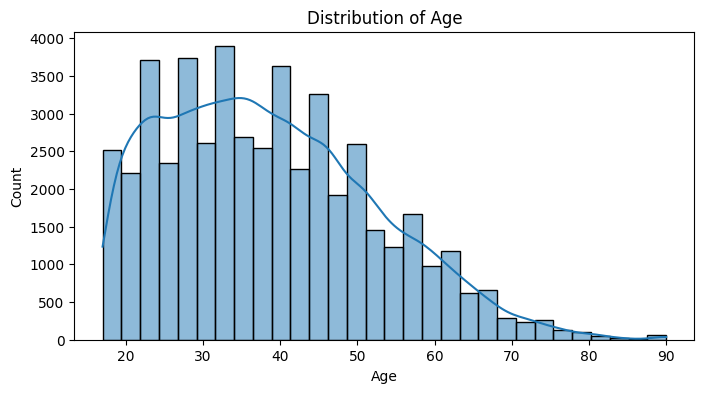

In [24]:
# Jawab 1.1 - Histrogram

plt.figure(figsize=(8,4))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

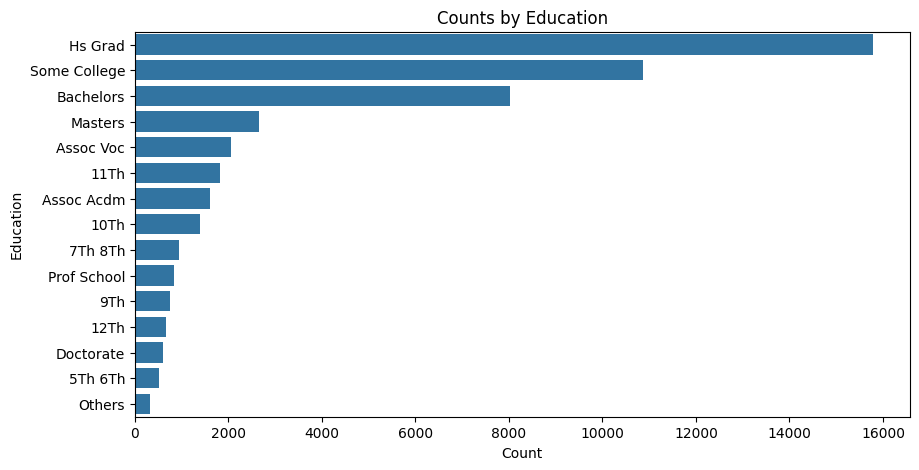

In [27]:
# Jawab 1.2 - Barchart

plt.figure(figsize=(10,5))
order = df['education'].value_counts().index
sns.countplot(data=df, y='education', order=order)
plt.title('Counts by Education')
plt.xlabel('Count')
plt.ylabel('Education')
plt.show()

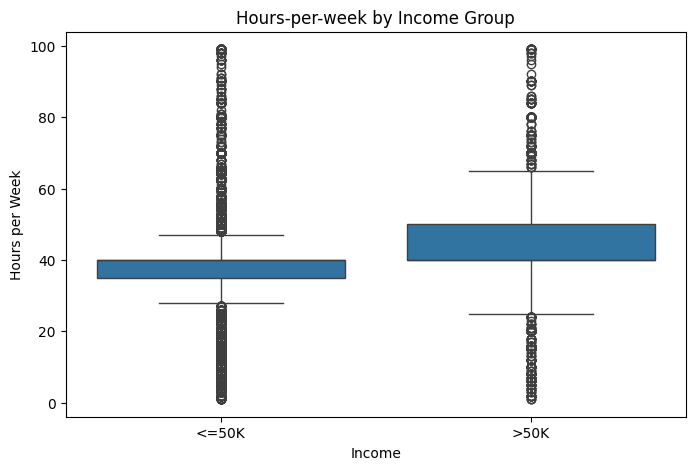

In [29]:
# Jawab 1.3 - Boxplot

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='income', y='hours-per-week')
plt.title('Hours-per-week by Income Group')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.show()

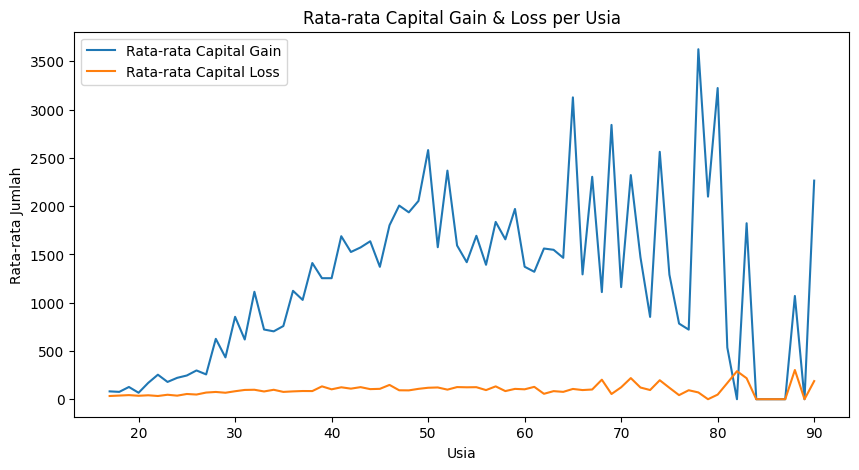

In [28]:
# Jawab 1.4 - Lineplot

plt.figure(figsize=(10,5))
age_group = df.groupby('age')[['capital-gain','capital-loss']].mean()
plt.plot(age_group.index, age_group['capital-gain'], label='Rata-rata Capital Gain')
plt.plot(age_group.index, age_group['capital-loss'], label='Rata-rata Capital Loss')
plt.title('Rata-rata Capital Gain & Loss per Usia')
plt.xlabel('Usia')
plt.ylabel('Rata-rata Jumlah')
plt.legend()
plt.show()

## Soal 2 - Analisis Visual (15 poin)
1. Fenomena apa yang terjadi pada distribusi data 'age'?
2. Jika terdapat data yang hilang pada variabel 'age', strategi apa yang Anda terapkan? Mengapa?
3. Berapa jumlah outlier pada setiap kategori 'income' berkaitan dengan 'hour-per-week'? Kategori apa yang paling banyak memiliki outlier?

In [ ]:
# Jawab dengan komentar python

'''
1. distribusi 'age' pada dataset Adult bersifat right-skewed (lebih banyak individu usia 20-50), dengan puncak di usia 20-40 dan menurun di usia lanjut.

2. Menggunakan media imputation karena usia cenderung skewed dan median tahan terhadap outlier serta lebih mewakili nilai tengah populasi

3. Outlier hours-per-week lebih banyak di kategori <=50 dibanding >50
'''

'\n  Bisa dengan multiple comment\n  seperti ini\n'

# Bagian 3 - Encoding Variabel Kategorical

## Soal 1 (5 poin)
Lakukan encoding pada 'Sex' dan 'Income'. 'Income' merupakan variabel target

In [27]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# Lihat nilai unik kolom 'sex' dan 'income'
print("Nilai unik 'sex':", df['sex'].unique())
print("Nilai unik 'income':", df['income'].unique())

# Encode kolom 'sex' → Male=1, Female=0
df['sex_encoded'] = df['sex'].map({'Male': 1, 'Female': 0})

# Jika ada format singkat (M/F), isi nilai yang kosong
df['sex_encoded'] = df['sex_encoded'].fillna(df['sex'].map({'M': 1, 'F': 0}))

# Encode kolom 'income' → >50K = 1, lainnya = 0
df['income_encoded'] = df['income'].apply(
    lambda val: 1 if (
        '50' in str(val) and
        ('+' in str(val) or '>' in str(val) or '50k' in str(val).lower())
    ) else 0
)

# Ganti NaN dengan 0
df['income_encoded'] = df['income_encoded'].fillna(0)

# Fallback mapping untuk format asli dataset
df['income_encoded'] = df['income'].replace({
    '<=50K': 0, '<=50K.': 0, '>50K': 1, '>50K.': 1
}).combine_first(df['income_encoded'])

# Tampilkan hasil encoding
print(df[['sex', 'sex_encoded', 'income', 'income_encoded']].head())


Nilai unik 'sex': ['Male' 'Female']
Nilai unik 'income': ['<=50K' '>50K' '<=50K.' '>50K.']
      sex  sex_encoded income  income_encoded
0    Male            1  <=50K               0
1    Male            1  <=50K               0
2    Male            1  <=50K               0
3    Male            1  <=50K               0
4  Female            0  <=50K               0


/tmp/ipython-input-974366675.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['income_encoded'] = df['income'].replace({


# Bagian 4 - Analisis Korelasi

## Soal 1 (10 poin)
1. Lakukan analisis korelasi pada variabel 'age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', dan 'income' (yang sudah di-encoding)
2. Berdasarkan hasil korelasi, informasi apa yang dapat Anda interpretasikan?

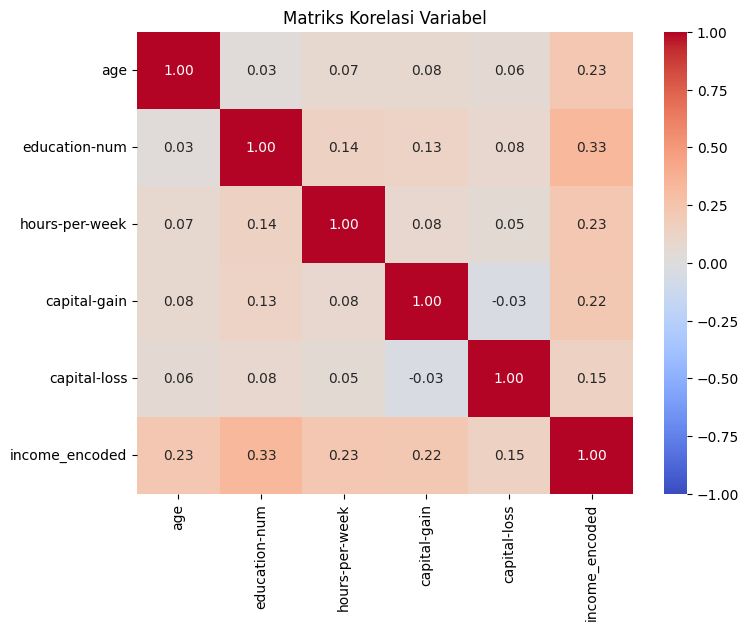


📊 Nilai Korelasi:


,age,education-num,hours-per-week,capital-gain,capital-loss,income_encoded
age,1.000000,0.030940,0.071558,0.077229,0.056944,0.230369
education-num,0.030940,1.000000,0.143689,0.125146,0.080972,0.332613
hours-per-week,0.071558,0.143689,1.000000,0.082157,0.054467,0.227687
capital-gain,0.077229,0.125146,0.082157,1.000000,-0.031441,0.223013
capital-loss,0.056944,0.080972,0.054467,-0.031441,1.000000,0.147554
income_encoded,0.230369,0.332613,0.227687,0.223013,0.147554,1.000000


In [26]:
# Analisis Korelasi Variabel Penting
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Kolom yang akan dianalisis
kolom_korelasi = [
    'age',              # Usia
    'education-num',    # Pendidikan (numerik)
    'hours-per-week',   # Jam kerja/minggu
    'capital-gain',     # Keuntungan modal
    'capital-loss',     # Kerugian modal
    'income_encoded'    # Target pendapatan
]

# Pastikan kolom 'education-num' ada
if 'df' in locals() or 'df' in globals():
    if 'education-num' not in df.columns:
        if 'education_num' in df.columns:
            kolom_korelasi[kolom_korelasi.index('education-num')] = 'education_num'
        elif 'education num' in df.columns:
            kolom_korelasi[kolom_korelasi.index('education-num')] = 'education num'
        else:
            print("⚠️ Kolom 'education-num' tidak ditemukan, dihapus dari daftar.")
            kolom_korelasi = [col for col in kolom_korelasi if col != 'education-num']

    # Ambil kolom yang tersedia di DataFrame
    kolom_tersedia = [col for col in kolom_korelasi if col in df.columns]
    if len(kolom_tersedia) < len(kolom_korelasi):
        hilang = set(kolom_korelasi) - set(kolom_tersedia)
        print(f"⚠️ Kolom berikut tidak ditemukan: {hilang}")

    if kolom_tersedia:
        # Hitung korelasi
        data_korelasi = df[kolom_tersedia].copy()
        matriks_korelasi = data_korelasi.corr()

        # Tampilkan heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(matriks_korelasi, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
        plt.title('Matriks Korelasi Variabel')
        plt.show()

        # Tampilkan tabel korelasi
        print("\n📊 Nilai Korelasi:")
        display(matriks_korelasi)
    else:
        print("Tidak ada kolom yang valid untuk analisis.")
else:
    print("DataFrame 'df' tidak ditemukan. Jalankan cell sebelumnya.")


In [ ]:
# semua nilai korelasi relatif rendah hingga sedang, artinya tidak ada hubungan sangat kuat antar variabel.

# Bagian 5 - Pra Pengolahan Data Pada Dataset MNIST

Pada bagian ini, Anda diminta untuk melakukan proses EDA dan pra pengolahan data sederhana pada dataset MNIST. Dataset MNIST merupakan data citra tulisan tangan untuk digil 0 hingga 9. Sebelum melakukan proses pengolahan, Anda akan dibantu dengan proses loading data dan inspeksi data.

Hints:
1. Hanya gunakan data **Test**
2. Anda perlu melakukan pengolahan terhadap semua data test (total 10k data). Anda dapat menggunakan function untuk mempermudah pekerjaan.

In [1]:
# Fetch data and inspect data shape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load train & test split
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


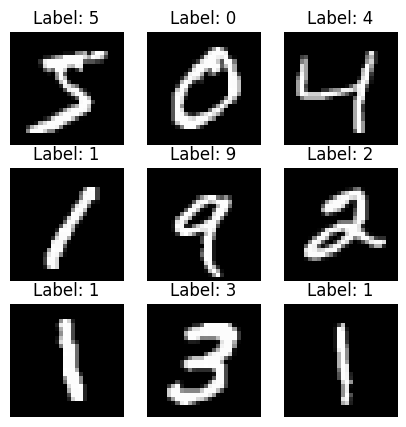

In [ ]:
# Inspeksi Visual
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.show()

## Soal 1 (10 poin)
1. Lakukan proses **upsampling** citra menjadi ukuran 32x32
2. Tampilakan 5 data hasil proses **upsampling**

Hint: Anda harus membuat array kosong untuk menampung hasil upsampling. Replace pada array X_test tidak dapat dilakukan karena data disimpan dalam bentuk ndarray yang memiliki ukuran fix (10000, (28,28))

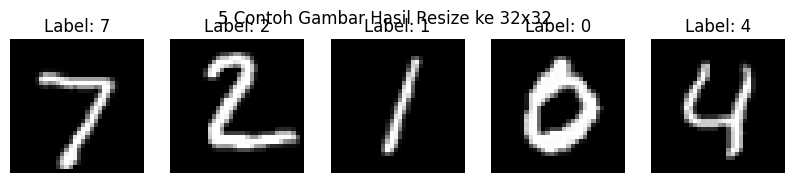

In [25]:
# Jawab Soal 1
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Resize semua gambar uji dari 28x28 ke 32x32
X_test_resized = np.array([
    cv2.resize(img, (32, 32), interpolation=cv2.INTER_CUBIC)
    for img in X_test
], dtype=np.uint8)

# Tampilkan 5 contoh hasil resize
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test_resized[i], cmap='gray')
    plt.title(f"Label: {y_test[i]}")
    plt.axis('off')

plt.suptitle('5 Contoh Gambar Hasil Resize ke 32x32')
plt.show()

In [3]:
# Install OpenCV library
!pip install -q opencv-python

## Soal 2 (10 poin)
Lakukan normalisasi nilai citra tiap piksel menjadi rentang 0-1

In [23]:
# Jawab Soal 2
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan
# Ubah tipe data ke float32 lalu skala nilai piksel ke rentang 0-1
X_test_norm = X_test_resized.astype('float32') / 255.0

# Cek nilai minimum dan maksimum setelah normalisasi
print("Min, Max setelah normalisasi:", X_test_norm.min(), X_test_norm.max())

Min, Max setelah normalisasi: 0.0 1.0


## Soal 3 (10 poin)
Ubah metriks citra menjadi array 1 dimensi. Lakukan pada semua data test yang sudah di resize dan normalisasi.

Hint: Anda harus membuat holder array kosong untuk menampung hasilnya.

In [24]:
# Jawab Soal 3
# Kerjakan pada cell ini
# Anda diperbolehkan menambah cell jika diperlukan

# Ubah data gambar menjadi bentuk 1 dimensi
n_samples = X_test_norm.shape[0]
X_test_flat = X_test_norm.reshape(n_samples, -1)  # hasil: (10000, 1024)

# Cek ukuran array hasil flatten
print("Ukuran setelah flatten:", X_test_flat.shape)

# Tampilkan panjang vektor pertama
print("Panjang vektor pertama:", len(X_test_flat[0]))

Ukuran setelah flatten: (10000, 1024)
Panjang vektor pertama: 1024
